In [ ]:
# !wget https://www.dropbox.com/scl/fi/z5bquci04gyxjx9fp4qj9/CovidDataset-20200427T133042Z-001.zip?rlkey=kqp9rtducuvsmm3m77vtypqny&dl=0

In [ ]:
# !unzip CovidDataset-20200427T133042Z-001.zip?rlkey=kqp9rtducuvsmm3m77vtypqny


In [ ]:
# !ls

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

In [ ]:
train_path = "CovidDataset/Train/"
val_path = "CovidDataset/Val/"

In [ ]:
folders = os.listdir(train_path)

Image of Covid X_ray.


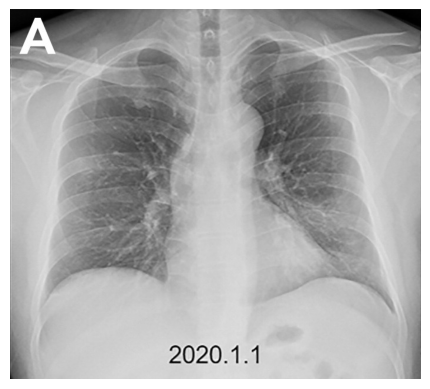

Image of Normal X_ray.


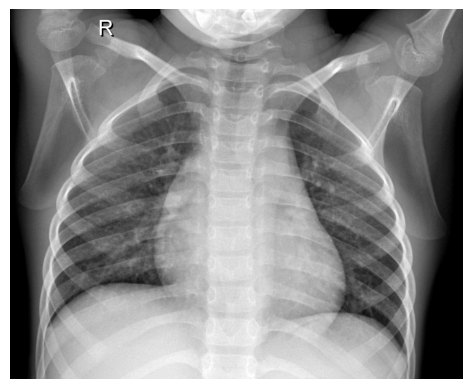

In [ ]:
for f in folders:
  img_paths = os.listdir(train_path + f)
  first_img_path = train_path + f +"/" + img_paths[0]
  img = image.load_img(first_img_path)
  plt.axis("off")
  print("Image of", f, "X_ray.")
  plt.imshow(img)
  plt.show()

# CNN Model

In [ ]:
# CNN based Model in keras
from keras.layers import *
from keras.models import *

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

Data Augementation using ImageDataGenerator

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale= 1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen =image.ImageDataGenerator(rescale= 1.0/255.0)

In [ ]:
# Data generator for training part

train_generator = train_datagen.flow_from_directory(
    "CovidDataset/Train",
    target_size = (224,224),
    batch_size = 20,
    class_mode="binary"
)

Found 224 images belonging to 2 classes.


In [ ]:
# Checking the classes

train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
# Data generator for validation part

validation_generator = test_datagen.flow_from_directory(
    "CovidDataset/Val",
    target_size = (224,224),
    batch_size = 20,
    class_mode="binary"
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.8245 - accuracy: 0.4812

8/8 [==============================] - 12s 958ms/step - loss: 0.8245 - accuracy: 0.4812 - val_loss: 0.6925 - val_accuracy: 0.4000
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.6857 - accuracy: 0.5903 - val_loss: 0.6783 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 6s 784ms/step - loss: 0.6334 - accuracy: 0.7222 - val_loss: 0.5245 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 7s 966ms/step - loss: 0.4248 - accuracy: 0.7875 - val_loss: 0.2861 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 7s 1s/step - loss: 0.3658 - accuracy: 0.8542 - val_loss: 0.3584 - val_accuracy: 0.9750
Epoch 6/10
8/8 [==============================] - 7s 933ms/step - loss: 0.2647 - accuracy: 0.8958 - val_loss: 0.1707 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 7s 939ms/step - loss: 0.3200 - accuracy: 0.8687 - val_loss: 0.2244 - val_accuracy: 0.9500
Epoch 8/10
8/8 [====================